# Magnetostatisches Feld eines Linienstroms

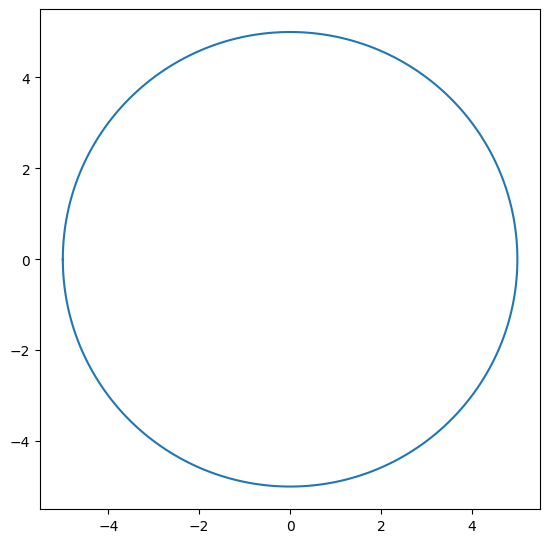

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=[5,5])
ax = fig.add_axes([1,1,1,1])
drift = 0.1
xmin, xmax = -20, 20
ymin, ymax = -20, 20
zmin, zmax = -20, 20
romin, romax = 0,10
phimin, phimax = -np.pi, np.pi
xsamples = 2 ** 8
ysamples = 2 ** 8
zsamples = 2 ** 8

phirange = np.linspace(phimin, phimax, num=xsamples)
rorange = np.linspace(romin, romax, num=ysamples)
xrange = np.linspace(xmin, xmax, num=xsamples)
yrange = np.linspace(ymin, ymax, num=ysamples)
zrange = np.linspace(zmin, zmax, num=zsamples)

dx = xrange[1] - xrange[0]
dy = yrange[1] - yrange[0]
dz = zrange[1] - zrange[0]

phi,ro  = np.meshgrid(phirange,rorange)
@np.vectorize
def dirac(x):
     return 1 if x*x < 0.01 else 0
    
R = 3
# Ort
r = dirac(R-ro)
# Richtung
j = dirac(R-ro)*np.array([phi+np.pi/2,np.zeros_like(r)+1])


x, z = np.meshgrid(xrange, yrange)

phi = np.linspace(-np.pi, np.pi, num=xsamples)
R = 5
def r(_phi):                                        # 0
    return R*np.array([np.cos(_phi), np.sin(_phi), np.zeros_like(_phi)])

def j(_phi):                                          # 0
    return R*np.array([-np.sin(_phi), np.cos(_phi), np.zeros_like(_phi)])

@np.vectorize
def polar_to_cartesian(r,phi):
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return np.array([x,y])

plt.plot(r(phi)[0],r(phi)[1])
def cross(a,b):
    c = np.zeros_like(a)
    c[0] = a[1]*b[2] - a[2]*b[1]
    c[1] = a[2]*b[0] - a[0]*b[2]
    c[2] = a[0]*b[1] - a[1]*b[0]
    return c


def plot3dVectField(feild):

    


# Feld auf der Z - Achse (zx ebene)

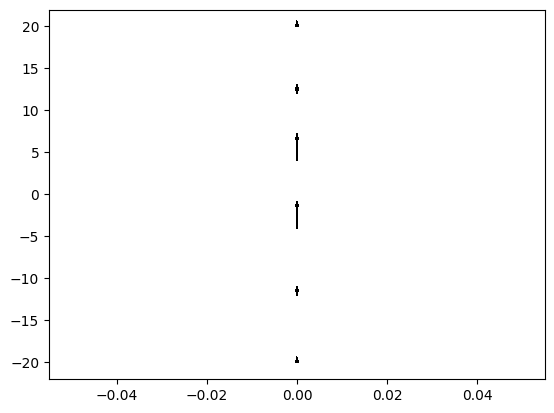

In [191]:

scalar = 0.45/(2*np.sqrt(1+z**2))

field_on_axis = np.array([np.zeros_like(scalar), np.zeros_like(scalar), scalar])

#plt.imshow(scalar, extent=(xmin, xmax, ymin, ymax), origin='lower', vmin=0, vmax=1)
#plt.colorbar()
div = xsamples//5
plt.quiver(np.zeros_like(x)[::div],z[::div], field_on_axis[0][::div],field_on_axis[2][::div],scale=1)

# Potenzial

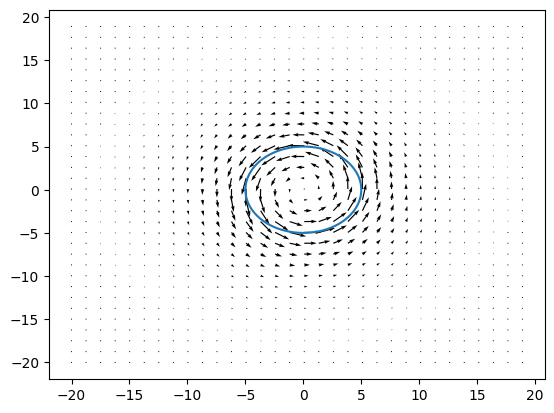

In [192]:

x, y = np.meshgrid(xrange, yrange)

kurve = r(phi)
plt.plot(kurve[0],kurve[1])

orts_vec = np.array([x,y])
field= np.zeros_like(orts_vec)
dphi = phi[1] - phi[0]
for _phi in phi:    
    r_x,r_y,r_z = r(_phi)
    j_x,j_y,j_z = j(_phi)
    distance = np.sqrt(1+(x-r_x)**2+(r_z)**2+(y-r_y)**2) 
    
    field += dphi*np.array([j_x/distance,j_y/distance])
div = xsamples//30
plt.quiver(x[::div,::div],z[::div,::div], field[0][::div,::div],field[1][::div,::div], scale=100)

# Feld


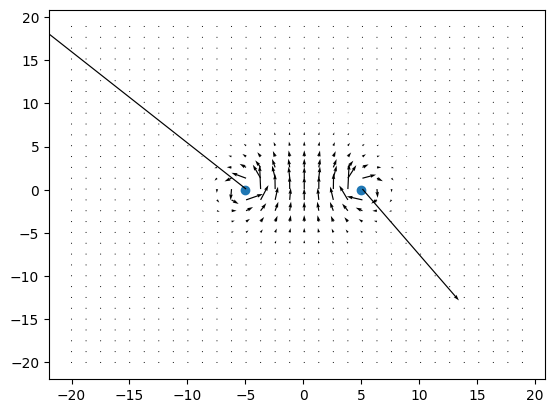

In [193]:
x, z = np.meshgrid(xrange, yrange)

kurve = r(phi)
plt.scatter([-R,R],[0,0])

orts_vec = np.array([x,z])
field = np.zeros_like(orts_vec)
dphi = phi[1] - phi[0]
for _phi in phi:    
    r_x,r_y,r_z = r(_phi) # (cos,sin)
    j_x,j_y,j_z = j(_phi) # (-sin, cos)
    to_point = np.array([x-r_x, np.zeros_like(x)-r_y, z-r_z])
    distance = np.linalg.norm(to_point,axis=0)
    
    cr_x,cr_y,cr_z = np.cross(j(_phi),to_point, axis=0)
    field += dphi*np.array([cr_x/distance**3,cr_z/distance**3])
div = xsamples//30
plt.quiver(x[::div,::div],z[::div,::div], field[0][::div,::div],field[1][::div,::div], scale=50)

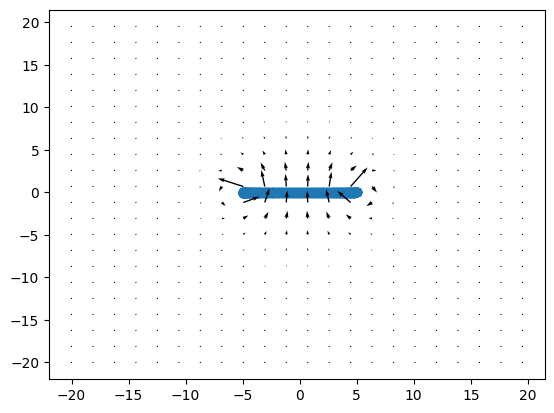

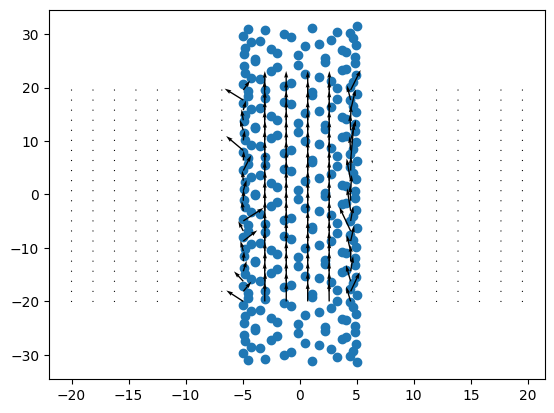

In [205]:
def spulenPlot(windungen= 100,steepness=0.1,R=1,scale=3000):
    phi = np.linspace(-np.pi*windungen, np.pi*windungen, num=xsamples)
    def spule(phi):
        return np.array([R*np.cos(phi),R*np.sin(phi),phi*steepness])

    def j_spule(phi):
        return np.array([-R*np.sin(phi),R*np.cos(phi),steepness])


    x, z = np.meshgrid(xrange, yrange)

    kurve = spule(phi)
    plt.scatter(kurve[0],kurve[2])

    orts_vec = np.array([x,z])
    field= np.zeros_like(orts_vec)
    dphi = phi[1] - phi[0]
    div =xsamples//30
    for _phi in phi:    
        r_x,r_y,r_z = spule(_phi)
        to_point = np.array([x-r_x,np.zeros_like(x)-r_y,z-r_z,])
        distance = np.linalg.norm(to_point,axis=0) 
        cr_x,cr_y,cr_z = np.cross(j_spule(_phi),to_point, axis=0)
        field += dphi*np.array([cr_x/(distance**3+drift),cr_z/(distance**3+drift)])
    #field = field/np.linalg.norm(field,axis=0)
    div = xsamples//20
    plt.quiver(x[::div,::div],z[::div,::div], field[0][::div,::div],field[1][::div,::div], scale=scale)
    plt.show()
    
spulenPlot(1,0.01,5,50)

spulenPlot(10000,0.001,5,50000)




## 1 Analytische Lösung

Idealisierungen:
* unendlich dünner Leiter
* ringförmiger Leiter
* endlicher Radius
* Bestimmung des magnetischen Potenzials und des magnetischen Feldes nur auf der Symmetrieachse. (Sven)

### 1.1 Herleitung

* siehe Vorlesung
* magnetisches Potenzial
* magnetisches Feld
* in Zylinderkoordinaten
* Lösung auf der Achse in möglichst einfacher Form


**Poisson-Gleichung**
$$
\Delta \vec{A} = -\mu \vec{j}
$$

**Lösung**
$$
\vec{A}(\vec{r}) = \frac{\mu}{4\pi} \iiint \frac{\vec{j}(\vec{r}')}{|\vec{r} - \vec{r}'|} dV'
$$

Der Strom verläuft auf einer Kreisbahn mit Radius $R$. Die Kurve kann durch $\vec{r}(\varphi) = \begin{pmatrix} R \cos(\varphi) \\ R \sin(\varphi) \\ 0 \end{pmatrix}$ beschrieben werden. Die Stromdichte ist konstant und beträgt $I$.

Um das Magnetische Potenzial $\vec{A}$ zu berechnen, müssen wir für jeden Punkt im Raum die durchschnittliche Flussrichtung des Stroms gewichtet mit dem kehrwert des Abstandes berechnen. Dazu integrieren wir über die gesamte Kreisbahn.

$\vec{A}= \frac{\mu_0}{4\pi} \int_0^{2\pi} \frac{I}{R} \begin{pmatrix} -\sin(\varphi) \\ \cos(\varphi) \\ 0 \end{pmatrix} d\varphi$



### 1.2 Visualisierung

* magnetisches Potenzial
* $z$-Komponente des magnetischen Feldes

## 2 Numerische Lösung

### 2.1 Herleitung

* Formeln zur numerischen Berechnung in beliebigem Raumpunkt
    * magnetisches Potenzial: aus der Quellendarstellung
    * magnetisches Feld: aus dem Potenzial
* alles in Zylinderkoordinaten
* Rotationssymmetrie ausnutzen

### 2.2 Berechnung

* Wahl des Integrationsverfahrens
* Wahl des Samplings

### 2.3 Visualisierung

* magnetisches Potenzial
* alle Komponenten des magnetischen Feldes (Raphael)
* alles in Zylinderkoodinaten
* Rotationssymmetrie ausnutzen
* geeignete zweidimensionale Schnitte (zx achse y=0 y=-3)
* freie Wahl der Bibliothek zum Plotten
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    * [Plotly](https://plotly.com/)
    * [Bokeh](https://bokeh.org/)
    * ...

## 3 Vergleich analytische und numerische Lösung

* Bestimmung des relativen Fehlers
* auf der Symmetrieachse
* magnetisches Potenzial
* $z$-Komponente des magnetischen Feldes
* Visualisierung wie bei der analytischen Lösung
* logarithmisch darstellen

## 4 Verallgemeinerung

* Spule
    * $N$ Windungen
    * Länge $L$
* magnetisches Potenzial und magnetisches Feld
* Vorgehen bei numerischer Berechnung und Visualisierung wie oben

### Fakultativ
* Ringstrom
    * Recherche analytische Lösung (falls möglich, kann kompliziert werden!)
    * Grenzübergang $R\to0$ und Vergleich mit infinitesimalem magnetischem Dipol
        * analytisch
        * numerisch
* Spule
    * Vergleich mit $N$ im Abstand $L/N$ aneinandergereihten Kreisströmen
    * Vergleich mit anderem Team: zylindrischer Permanentmagnet

## 5 Ausblick:  Zeitlich veränderlicher Strom

Idealisierungen:
* unendlich dünner Leiter
* ringförmiger Leiter
* endlicher Radius
* Bestimmung des magnetischen Potenzials und des magnetischen Feldes nur auf der Symmetrieachse.

Verallgemeinerung: *zeitlich veränderlicher* Strom
* quasistatischer Fall
* dynamischer Fall

Nur eine kurze Beschreibung dessen, was zur Bestimmung des zeitlich veränderlichen magnetischen Feldes zu tun wäre - insbesondere ein paar Worte zu den erwarteten Hürden in Bezug auf:
* Zeitkomplexität
* Speicherbedarf
* Genauigkeit